In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Generating test data**

In [ ]:
import os
# Define path
test_data_path = "/content/drive/MyDrive/test_data"

# Create the directory if it doesn't exist
os.makedirs(test_data_path, exist_ok=True)

print(f"✅ Directory created or already exists at: {test_data_path}")


✅ Directory created or already exists at: /content/drive/MyDrive/test_data


In [ ]:
import os
import numpy as np
import librosa
import tensorflow as tf
import tensorflow_hub as hub

# Load YAMNet model
yamnet_model_handle = 'https://tfhub.dev/google/yamnet/1'
yamnet_model = hub.load(yamnet_model_handle)

# Load your fine-tuned classifier model
classifier = tf.keras.models.load_model('/content/drive/MyDrive/fine_tuned_yamnet_classifier1.keras')

# Label map
label_map = {0: "non-emergency", 1: "emergency"}

# Directory containing test .wav files
test_dir = "/content/drive/MyDrive/test_data_wav"

# results = []

# for file_name in os.listdir(test_dir):
#     if not file_name.endswith(".wav"):
#         continue

#     file_path = os.path.join(test_dir, file_name)

#     try:
#         # Load waveform
#         waveform, sr = librosa.load(file_path, sr=16000, mono=True)
#         waveform = waveform.astype(np.float32)

#         # Get embeddings from YAMNet
#         scores, embeddings, spectrogram = yamnet_model(waveform)
#         embedding = tf.reduce_mean(embeddings, axis=0).numpy().reshape(1, -1)  # Shape: (1, 1024)

#         # Predict using your classifier
#         pred = classifier.predict(embedding, verbose=0)
#         class_idx = int(np.argmax(pred[0]))
#         confidence = float(pred[0][class_idx])
#         label = label_map[class_idx]

#         results.append((file_name, label, confidence))

#     except Exception as e:
#         print(f"❌ Error with {file_name}: {e}")

def predict_emergency(file_path, model, yamnet_model, label_map, threshold=0.85):
    try:
        # Step 1: Load and preprocess audio
        waveform, sr = librosa.load(file_path, sr=16000, mono=True)

        # Step 2: Get embeddings from YAMNet
        _, embeddings, _ = yamnet_model(waveform)

        # Step 3: Average the embeddings
        avg_embedding = tf.reduce_mean(embeddings, axis=0)
        avg_embedding = tf.expand_dims(avg_embedding, axis=0)

        # Step 4: Predict with your classifier
        pred = model.predict(avg_embedding)
        class_idx = np.argmax(pred)
        confidence = float(pred[0][class_idx])

        # Step 5: Apply confidence threshold
        if confidence < threshold:
            return "uncertain", confidence
        else:
            return label_map[class_idx], confidence

    except Exception as e:
        return f"Error: {e}", 0.0


# Show predictions
# for single file
# file_path = "/content/drive/MyDrive/test_data/help_example.wav"
# label, confidence = predict_emergency(file_path, model, yamnet_model, label_map)
# print(f"🔍 Predicted: {label} (Confidence: {confidence:.2f})")

#for batch
for file in os.listdir(test_dir):
    if file.endswith('.wav'):
        file_path = os.path.join(test_dir, file)
        label, confidence = predict_emergency(file_path, classifier, yamnet_model, label_map)
        print(f"{file} → {label} ({confidence:.2f})")

# print("\n📊 Prediction Results:")
# for fname, label, conf in results:
#     print(f"🔍 {fname} → {label} (Confidence: {conf:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
human-walking-80552.wav → uncertain (0.67)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
human-voice-saying-oh-no-301694.wav → emergency (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
human-snore-type-1-265473.wav → non-emergency (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
15-human-body-97360.wav → uncertain (0.55)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
medical-ambulance-siren-290716.wav → emergency (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
air-raid-siren-sound-effect-241383.wav → emergency (0.96)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
police-siren-21498.wav → emergency (0.95)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
fire-truck-siren-307510.wav → emergency (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
woman-screaming-sfx-screaming-sound-effect-320169.wav → uncertain (0.75)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
girl-scream-45657.wav → emergency (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
help-help-322552.wav → emergency (0.99)


**Testing after adding more data in the fine_tune_data and doing some changes in fine tuning of YAMNet**

*Converting .aac files to .wav form*

In [ ]:
from pydub import AudioSegment
import os

# Your input and output paths
aac_dir = "/content/drive/MyDrive/Recordings"
wav_dir = "/content/drive/MyDrive/test2_data"

# Create output directory if it doesn't exist
os.makedirs(wav_dir, exist_ok=True)

# Convert each .aac file
for filename in os.listdir(aac_dir):
    if filename.endswith(".aac"):
        aac_path = os.path.join(aac_dir, filename)
        wav_path = os.path.join(wav_dir, filename.replace(".aac", ".wav"))

        try:
            audio = AudioSegment.from_file(aac_path, format="aac")
            audio = audio.set_channels(1)        # mono
            audio = audio.set_frame_rate(16000)  # 16 kHz
            audio.export(wav_path, format="wav")
            print(f"✅ Converted: {filename} → {wav_path}")
        except Exception as e:
            print(f"❌ Failed to convert {filename}: {e}")


✅ Converted: scream_girl.aac → /content/drive/MyDrive/test2_data/scream_girl.wav
✅ Converted: traffic.aac → /content/drive/MyDrive/test2_data/traffic.wav
✅ Converted: cough.aac → /content/drive/MyDrive/test2_data/cough.wav
✅ Converted: convo.aac → /content/drive/MyDrive/test2_data/convo.wav
✅ Converted: help_male.aac → /content/drive/MyDrive/test2_data/help_male.wav
✅ Converted: scream_female.aac → /content/drive/MyDrive/test2_data/scream_female.wav
✅ Converted: fart_sound.aac → /content/drive/MyDrive/test2_data/fart_sound.wav
✅ Converted: concert.aac → /content/drive/MyDrive/test2_data/concert.wav
✅ Converted: scream male.aac → /content/drive/MyDrive/test2_data/scream male.wav
✅ Converted: help.aac → /content/drive/MyDrive/test2_data/help.wav
✅ Converted: thunder.aac → /content/drive/MyDrive/test2_data/thunder.wav
✅ Converted: convo2.aac → /content/drive/MyDrive/test2_data/convo2.wav
✅ Converted: ambulance.aac → /content/drive/MyDrive/test2_data/ambulance.wav
✅ Converted: ambulance 2.

*Testing the data after introducing the threshhold of 0.85 and third label called 'uncertain'*

In [ ]:
import os
import numpy as np
import librosa
import tensorflow as tf
import tensorflow_hub as hub

# Load YAMNet model
yamnet_model_handle = 'https://tfhub.dev/google/yamnet/1'
yamnet_model = hub.load(yamnet_model_handle)

# Load your fine-tuned classifier model
classifier = tf.keras.models.load_model('/content/drive/MyDrive/fine_tuned_yamnet_classifier1.keras')

# Label map
label_map = {0: "non-emergency", 1: "emergency"}

# Directory containing test .wav files
test_dir = "/content/drive/MyDrive/test2_data"


def predict_emergency(file_path, model, yamnet_model, label_map, threshold=0.85):
    try:
        # Step 1: Load and preprocess audio
        waveform, sr = librosa.load(file_path, sr=16000, mono=True)

        # Step 2: Get embeddings from YAMNet
        _, embeddings, _ = yamnet_model(waveform)

        # Step 3: Average the embeddings
        avg_embedding = tf.reduce_mean(embeddings, axis=0)
        avg_embedding = tf.expand_dims(avg_embedding, axis=0)

        # Step 4: Predict with your classifier
        pred = model.predict(avg_embedding)
        class_idx = np.argmax(pred)
        confidence = float(pred[0][class_idx])

        # Step 5: Apply confidence threshold
        if confidence < threshold:
            return "uncertain", confidence
        else:
            return label_map[class_idx], confidence

        #return label_map[class_idx], confidence # Return the label and confidence


    except Exception as e:
        return f"Error: {e}", 0.0 # Return error message and 0.0 confidence


# Show predictions
# for single file
# file_path = "/content/drive/MyDrive/test_data/help_example.wav"
# label, confidence = predict_emergency(file_path, model, yamnet_model, label_map)
# print(f"🔍 Predicted: {label} (Confidence: {confidence:.2f})")

#for batch
for file in os.listdir(test_dir):
    if file.endswith('.wav'):
        file_path = os.path.join(test_dir, file)
        label, confidence = predict_emergency(file_path, classifier, yamnet_model, label_map)
        print(f"{file} → {label} ({confidence:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
scream_girl.wav → uncertain (0.84)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
traffic.wav → non-emergency (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
cough.wav → non-emergency (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
convo.wav → uncertain (0.69)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
help_male.wav → uncertain (0.54)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
scream_female.wav → non-emergency (0.86)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
fart_sound.wav → non-emergency (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
concert.wav → non-emergency (0.92)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
scream male.wav → uncertain (0.78)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
help.wav → non-emergency (0.94)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
thunder.wav → non-emergency (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
convo2.wav → uncertain (0.51)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
ambulance.wav → emergency (0.99)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
ambulance 2.wav → emerge

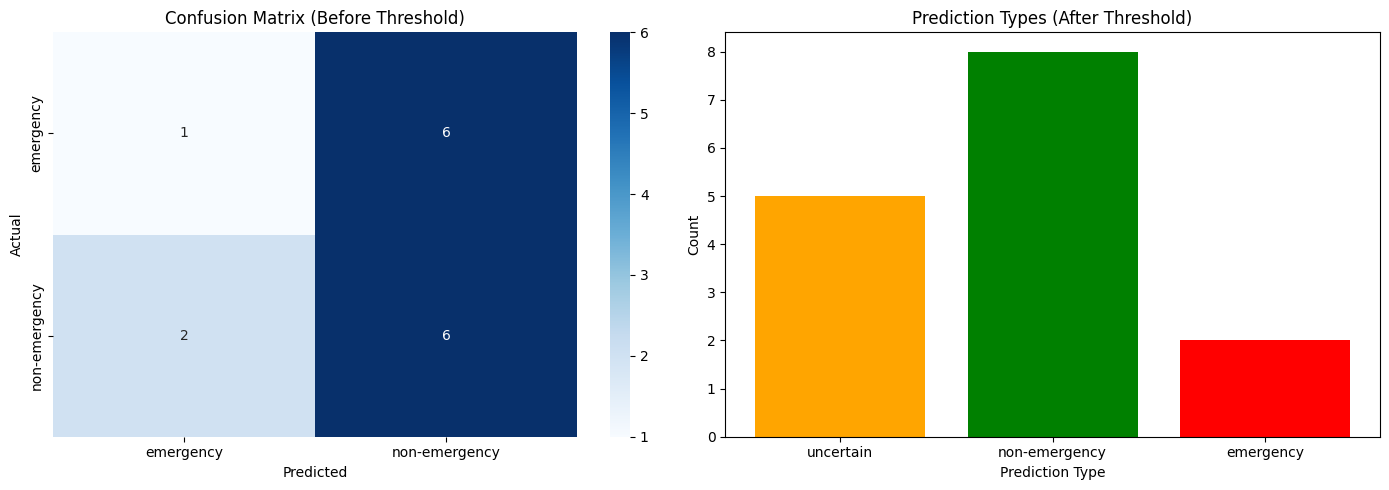

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ---------- BEFORE THRESHOLD ----------
y_true_before = ['emergency']*7 + ['non-emergency']*8
y_pred_before = [
    'non-emergency',  # scream_girl.wav ❌
    'non-emergency',  # traffic ✅
    'non-emergency',  # cough ✅
    'emergency',      # convo ❌
    'non-emergency',  # help_male ❌
    'non-emergency',  # scream_female ❌
    'non-emergency',  # fart ✅
    'non-emergency',  # concert ✅
    'non-emergency',  # scream male ❌
    'non-emergency',  # help ❌
    'non-emergency',  # thunder ✅
    'non-emergency',  # convo2 ✅
    'emergency',      # ambulance ✅
    'emergency',      # ambulance 2 ✅
    'non-emergency',  # breath ✅
]

cm_before = confusion_matrix(y_true_before, y_pred_before, labels=['emergency', 'non-emergency'])

# ---------- AFTER THRESHOLD ----------
labels_after = [
    'uncertain', 'non-emergency', 'non-emergency', 'uncertain', 'uncertain',
    'non-emergency', 'non-emergency', 'non-emergency', 'uncertain',
    'non-emergency', 'non-emergency', 'uncertain', 'emergency',
    'emergency', 'non-emergency'
]

# Count each class for bar plot
from collections import Counter
after_counts = Counter(labels_after)

# ---------- PLOTTING ----------
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix Before Threshold
sns.heatmap(cm_before, annot=True, fmt="d", cmap="Blues", xticklabels=['emergency', 'non-emergency'], yticklabels=['emergency', 'non-emergency'], ax=axs[0])
axs[0].set_title("Confusion Matrix (Before Threshold)")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")

# Bar Plot After Threshold
axs[1].bar(after_counts.keys(), after_counts.values(), color=['orange', 'green', 'red'])
axs[1].set_title("Prediction Types (After Threshold)")
axs[1].set_ylabel("Count")
axs[1].set_xlabel("Prediction Type")

plt.tight_layout()
plt.show()


In [ ]:
train_acc = classifier.evaluate(train_X, train_y)
val_acc = classifier.evaluate(val_X, val_y)
test_acc = classifier.evaluate(test_X, test_y)


NameError: name 'train_X' is not defined

From all the testing we done, conclusion is coming out that because of smaller dataset fine tuning of the YAMNet is not an effective technique as the case of **Overfiting** is occuring. So, we are switching from **Fine Tuning** to **Transfer Learning**

**Testing of the  model prepared using Transfer Learning**

In [ ]:
!pip install tensorflow_io soundfile

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 19.6 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_io as tfio
import soundfile as sf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
import pandas as pd

/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl8str_util8EndsWithESt17basic_string_viewIcSt11char_traitsIcEES4_']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZN3tsl8str_util9LowercaseB5cxx11ESt17basic_s

In [ ]:
# Loading models
yamnet_model = hub.load('https://tfhub.dev/google/yamnet/1')
model = load_model('/content/drive/MyDrive/best_emergency_model.h5')

In [ ]:
# Defining Audio-to_Embedding Function

def load_audio_and_embed(filepath):
  try:
    audio, sr = sf.read(filepath)
    if len(audio.shape) > 1:
      audio = np.mean(audio, axis=1)
    waveform = tf.convert_to_tensor(audio, dtype=tf.float32)
    if sr != 16000:
      waveform = tfio.audio.resample(waveform, rate_in=sr, rate_out=16000)
    _, embeddings, _ = yamnet_model(waveform)
    return tf.reduce_mean(embeddings, axis=0)
  except Exception as e:
    print(f"Error processing {filepath}: {e}")
    return None

In [ ]:
# Preparing Test set + True Labels
folder_path = '/content/drive/MyDrive/test2_data'
true_labels_dict = {
    'traffic.wav': 0,
    'thunder.wav': 0,
    'scream_girl.wav': 1,
    'scream_female.wav': 1,
    'scream_male.wav': 1,
    'help.wav': 0,
    'help_male.wav': 1,
    'fart.wav': 0,
    'cough.wav': 0,
    'convo2.wav': 0,
    'convo.wav': 0,
    'concert.wav': 0,
    'breath.wav': 0,
    'ambulance.wav': 1,
    'ambulance2.wav': 1,
}
X_test2, y_true, file_names = [], [], []
for file in os.listdir(folder_path):
  if file.endswith('.wav') and file in true_labels_dict:
    path = os.path.join(folder_path, file)
    embedding = load_audio_and_embed(path)
    if embedding is not None:
      X_test2.append(embedding.numpy())
      y_true.append(true_labels_dict[file])
      file_names.append(file)
X_test2, y_true = np.array(X_test2), np.array(y_true)


In [ ]:
# Making prediction and showing result

#prediction
y_pred_probs = model.predict(X_test2)
y_pred = (y_pred_probs>0.5).astype(int).flatten()
# Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"\n✅ Test Accuracy: {acc*100:.2f}%")

# Displaying in table
results_df = pd.DataFrame({
    'File Name': file_names,
    'True Label': y_true,
    'Predicted Label': y_pred,
    'Category': ['Emergency' if pred else 'Non-Emergency' for pred in y_pred]
  })
#results_df = results_df.sort_values(by= "File Name")
display(results_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

✅ Test Accuracy: 66.67%


,File Name,True Label,Predicted Label,Category
0,scream_girl.wav,1,0,Non-Emergency
1,traffic.wav,0,1,Emergency
2,cough.wav,0,1,Emergency
3,convo.wav,0,0,Non-Emergency
4,help_male.wav,1,1,Emergency
5,scream_female.wav,1,1,Emergency
6,concert.wav,0,1,Emergency
7,help.wav,0,0,Non-Emergency
8,thunder.wav,0,0,Non-Emergency
9,convo2.wav,0,0,Non-Emergency


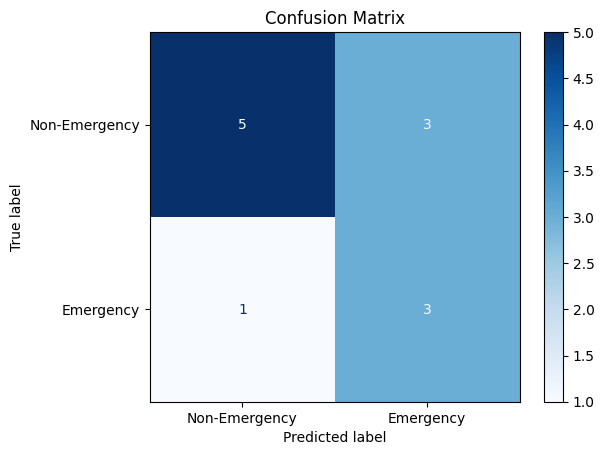

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Emergency', 'Emergency'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()